# RMS Titanic

#### The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history

## 1. Importing the Libraries

In [193]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
sns.set()
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Getting the Data

In [194]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 3. Understanding the Data

In [195]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [196]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Details about the dataset
### Below are the features provided in the Test dataset.

1.Passenger Id: and id given to each traveler on the boat

2.Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)

3.SibSp: number of siblings and spouses traveling with the passenger

4.Parch: number of parents and children traveling with the passenger

5.The ticket number

6.The ticket Fare

7.The cabin number

8.embarked_town: Port of embarkation ( Cherbourg(C), Queenstown(Q), Southampton(S))

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [199]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [201]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Exploratory Data Analysis

### Pclass

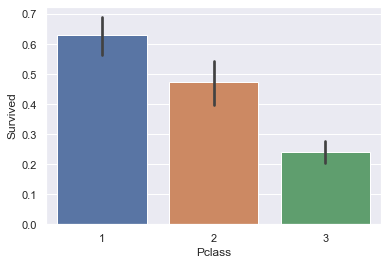

In [202]:
sns.barplot(x='Pclass', y='Survived', data=train)

### Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

### Sex
Variation with class and gender, women made it alive on the Titanic way more than men because women and children were provided with lifeboats first when the Titanic was sinking

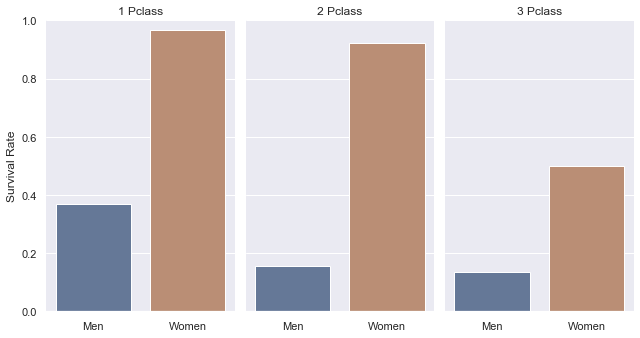

In [203]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

### PClass
The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

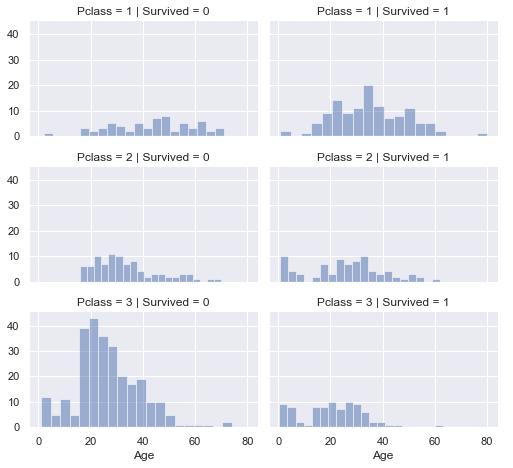

In [204]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch:

### SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic.

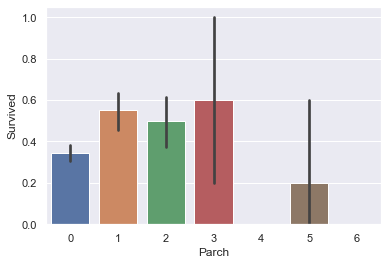

In [205]:
sns.barplot(x="Parch", y="Survived", data=train)

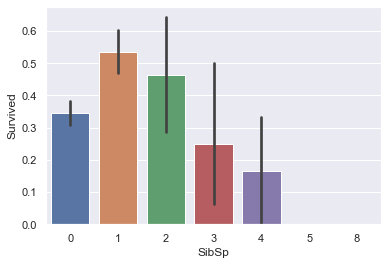

In [206]:
sns.barplot(x="SibSp", y="Survived", data=train)

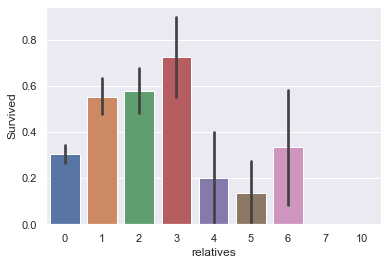

In [207]:
train_copy = train.copy()
test_copy = test.copy()
data = [train_copy,test_copy]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
axes = sns.barplot('relatives','Survived', data=train_copy)

In [208]:
train_copy['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

## 5. Data Preprocessing

### A. First, drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

In [209]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

### B. Name 
>>Below are steps for preprocessing:
1. Extract the titles first
2. Give numerical code to titles
3. Drop the Name column

In [210]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['title']  = dataset['Name'].str.extract('([A-Za-z]+)\.', expand= False)
dataset.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [211]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Sir           1
Don           1
Lady          1
Mme           1
Capt          1
Countess      1
Name: title, dtype: int64

In [212]:
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

In [213]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['title'] = dataset['title'].map(title_mapping)

In [214]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [215]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [216]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [217]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## C. SibSp & Parch
> Below are the preprocessing steps:-
1. Count the total number of Siblings and Parch 
2. Assign it into the new column 
3. delete the Sibsp and Parch columns in the Data

In [218]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
family_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10}
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [219]:
train.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)

In [220]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,female,38.0,PC 17599,71.2833,C85,C,2,1
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,1,1,female,35.0,113803,53.1000,C123,S,2,1
4,0,3,male,35.0,373450,8.0500,NaN,S,0,0


In [221]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,3,male,34.5,330911,7.8292,NaN,Q,0,0
1,3,female,47.0,363272,7.0000,NaN,S,2,1
2,2,male,62.0,240276,9.6875,NaN,Q,0,0
3,3,male,27.0,315154,8.6625,NaN,S,0,0
4,3,female,22.0,3101298,12.2875,NaN,S,2,2


## D. Sex
> Below are the preprocessing steps:-
1. Map the females to 1 and Males to 0

In [222]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

## E. Embarked
> Below are the preprocessing steps:-
1. Emabarked column has only two missing value in only trainning data so we can replace with the value that has highest number of occurence.

In [223]:
# we can replace with S all the missing values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [224]:
common_value = 'S'

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [225]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [226]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,0,3,0,22.0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,1,38.0,PC 17599,71.2833,C85,1,2,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,1,1,1,35.0,113803,53.1000,C123,0,2,1
4,0,3,0,35.0,373450,8.0500,NaN,0,0,0


In [227]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,3,0,34.5,330911,7.8292,NaN,2,0,0
1,3,1,47.0,363272,7.0000,NaN,0,2,1
2,2,0,62.0,240276,9.6875,NaN,2,0,0
3,3,0,27.0,315154,8.6625,NaN,0,0,0
4,3,1,22.0,3101298,12.2875,NaN,0,2,2


## F. Fare
> Below are the preprocessing steps:-
1. Converting “Fare” from float to int64, using the “astype()”

In [228]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test.head(10)

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,3,0,34.5,330911,7.8292,NaN,2,0,0
1,3,1,47.0,363272,7.0000,NaN,0,2,1
2,2,0,62.0,240276,9.6875,NaN,2,0,0
3,3,0,27.0,315154,8.6625,NaN,0,0,0
4,3,1,22.0,3101298,12.2875,NaN,0,2,2
5,3,0,14.0,7538,9.2250,NaN,0,0,0
6,3,1,30.0,330972,7.6292,NaN,2,1,0
7,2,0,26.0,248738,29.0000,NaN,0,0,2
8,3,1,18.0,2657,7.2292,NaN,1,2,0
9,3,0,21.0,A/4 48871,24.1500,NaN,0,0,2


In [229]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

## G. Ticket
> Below are the preprocessing steps:-
1. Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset

In [230]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [231]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

## H. Cabin
> Below are the preprocessing steps:-
1. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck

In [232]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

## I. Age
> Below are the preprocessing steps:-
1. Age is missing in both train and test dataset so we first replaced all null values by median age 
2. 

In [233]:
train.groupby("title").transform("median")

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Deck
0,0,3,0,30.0,0,0,0,8
1,1,2,1,35.0,1,0,1,8
2,1,3,1,21.0,0,0,0,8
3,1,2,1,35.0,1,0,1,8
4,0,3,0,30.0,0,0,0,8
...,...,...,...,...,...,...,...,...
886,1,2,0,9.0,1,0,2,8
887,1,3,1,21.0,0,0,0,8
888,1,3,1,21.0,0,0,0,8
889,0,3,0,30.0,0,0,0,8


In [234]:
train["Age"].fillna(train.groupby("title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("title")["Age"].transform("median"), inplace=True)

In [235]:
train.tail(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamilySize,Deck
886,0,2,0,27.0,0,0,3,0,8
887,1,1,1,19.0,1,0,1,0,2
888,0,3,1,21.0,1,0,1,3,8
889,1,1,0,26.0,1,1,0,0,3
890,0,3,0,32.0,0,2,0,0,8


In [236]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    dataset['Age'] = dataset['Fare'].astype(int)

In [237]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,FamilySize,Deck
0,0,3,0,0,0,0,0,1,8
1,1,1,1,2,2,1,2,1,3
2,1,3,1,0,0,0,1,0,8
3,1,1,1,2,2,0,2,1,3
4,0,3,0,0,0,0,0,0,8


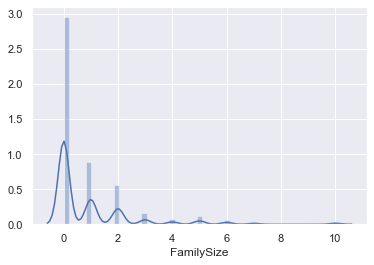

In [238]:
sns.distplot(train['FamilySize'])

In [239]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

##  6. Applying Machine Learning Model

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=1, stratify=target)

# K-NN

In [242]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [243]:
#show first 5 model predictions on the test data
predict = knn.predict(test)
df1 = pd.DataFrame(predict)
df1

,0
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [244]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)


0.8100558659217877

## Get Ready for Kaggle Submission1

In [245]:

submission1 = pd.read_csv("test.csv")
df1['Survived'] = df1.values
df1['PassengerId'] = submission1['PassengerId']
df1.drop(df1.columns[0], axis=1, inplace=True)
df1.to_csv("Submission1", sep=',', encoding='utf-8', index=False)
df1

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


## Logistic Regression

In [246]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
accuracy_score(y_test,Y_pred_log)

/Users/gauravbansal1600/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8156424581005587

In [247]:
Y_pred_log_test = logreg.predict(test)
df2 = pd.DataFrame(Y_pred_log_test)
df2

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


## Get Ready for Kaggle Submission2

In [248]:
submission2 = pd.read_csv("test.csv")
df2['Survived'] = df2.values
df2['PassengerId'] = submission2['PassengerId']
df2.drop(df2.columns[0], axis=1, inplace=True)
df2.to_csv("Submission2", sep=',', encoding='utf-8', index=False)

## Random Forest

In [249]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction_RanF = random_forest.predict(test)
df3 = pd.DataFrame(Y_prediction_RanF)
random_forest.score(X_train, y_train)

0.8848314606741573

## Get Ready for Kaggle Submission3

In [250]:
submission3 = pd.read_csv("test.csv")
df3['Survived'] = df3.values
df3['PassengerId'] = submission3['PassengerId']
df3.drop(df3.columns[0], axis=1, inplace=True)
df3.to_csv("Submission3", sep=',', encoding='utf-8', index=False)

##  Resources

1. Titanic Datasets (http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf)
2. Python Data Science Handbook.(https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)
3. Kaggle Competition Link(https://www.kaggle.com/c/titanic/overview)

